In [1]:
# Import all necessary libraries and functions.
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import seaborn as sns
from sklearn.preprocessing import label_binarize

### Funções úteis.

In [2]:
def plotSamples(x1,x2,y,filename):
    '''Plot the samples.'''
    idx0 = np.argwhere(y == 0)
    idx1 = np.argwhere(y == 1)

    plt.plot(x1[idx0], x2[idx0], '.', label='Class 0')
    plt.plot(x1[idx1], x2[idx1], 'rx', label='Class 1')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14)
    plt.legend()
    plt.savefig(filename, dpi=600)
    plt.show()
    
def plotDecisionBoundary(clf,x1,x2,filename):
    '''Plot the decision boundary. 
       For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].'''
    
    x_min, x_max = x1.min() - .5, x1.max() + .5
    y_min, y_max = x2.min() - .5, x2.max() + .5
    h = 250
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, h), np.linspace(y_min, y_max, h))

    zz = np.zeros((xx.shape))
    for i in range(0, len(xx)):
        for j in range(0, len(yy)):
            aux = clf.predict_proba(np.c_[xx[i,j], yy[i,j]])
            zz[i,j] = aux[0,1]

    plt.figure(figsize=(7,7))
    ax = plt.subplot(1, 1, 1, projection='3d')
    ax.plot_surface(xx, yy, zz, cmap=cm.coolwarm, linewidth=0, antialiased=True)
    # Add a color bar which maps values to colors.
    ax.set_xlabel('$x_1$',fontsize=14)
    ax.set_ylabel('$x_2$',fontsize=14)
    ax.set_zlabel('$y$',fontsize=14)
    plt.savefig(filename, dpi=600)
    plt.show()

### Função lógica E ruidosa

In [3]:
# Number of examples.
N = 10000

# Reset PN sequence generator.
seed = 4
np.random.seed(seed)

# Attributes.
x1 = np.random.randint(0,2,N)
x2 = np.random.randint(0,2,N)

# Noise.
w1 = 0.1*np.random.randn(N,)
w2 = 0.1*np.random.randn(N,)

# AND labels.
y = x1 & x2

# One-hot encode labels.
y_bin = label_binarize(y, classes=[0, 1, 2])[:,0:2]

# Noisy attributes.
x1 = x1 + w1
x2 = x2 + w2

X = np.c_[x1,x2]

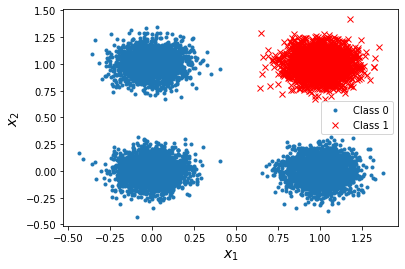

In [4]:
plotSamples(x1,x2,y,'and.png')

### Treinando a rede neural.

Usaremos um objeto da classe `MLPClassifier` da biblioteca scikit-learn para encontrar uma função discriminante que separe estas classes.

A classe `MLPClassifier` implementa uma rede neural multi-layer perceptron para tarefas de classificação, ou seja, ela terá um número de neurônios na camada de saída igual ao número de classes do problema e usa a função `softmax` como ativação dos neurônios da camada de saída.

A documentação da classe pode ser encontrada em:
+ https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


Como a função AND é linearmente separável (ver figura acima), para classificar esta função, usaremos uma rede MLP com 0 camadas escondidas e apenas um neurônio na camada de saída.

Total: 1 nó.

In [5]:
clf = MLPClassifier(hidden_layer_sizes=(), activation='logistic', solver='lbfgs', random_state=seed)

clf.fit(X, y_bin)

y_pred_bin = clf.predict(X)

y_pred = np.zeros(N,)
acc = 0
for i in range(0,len(y_bin)):
    if (y_bin[i] == y_pred_bin[i]).all() == True:
        acc += 1
    if((y_pred_bin[i] == [1, 0]).all() == True):
        y_pred[i] = 0
    else:
        y_pred[i] = 1
acc /= len(y_bin)
print('Accuracy: ', acc)

Accuracy:  0.9997


In [6]:
print('Output coeff shape: ', clf.coefs_[0].shape)
print('n_layers: ', clf.n_layers_)
print('n_iter: ', clf.n_iter_)

Output coeff shape:  (2, 2)
n_layers:  2
n_iter:  16


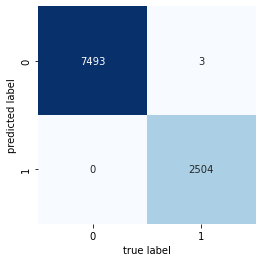

In [7]:
# Plot the confusion matrix.
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(2), yticklabels=range(2), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Plotando as regiões de decisão.

Um nó aproxima uma função de limiar suave.

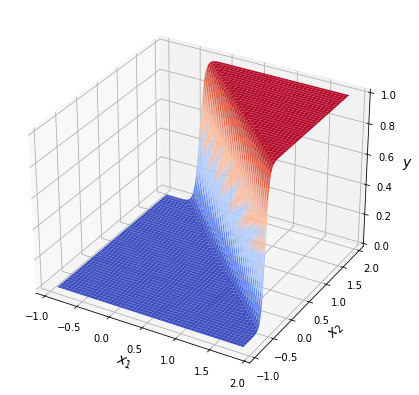

In [8]:
plotDecisionBoundary(clf,x1,x2,'mlp1.png')